*Artificial Intelligence Master's Degree (2022 - 2023)*

*Machine Learning for Computer Vision*

# **Fine-Tuning a Vision Transformer for Music Genre Classification**

Author: `Michael Ghaly`

Student ID: `0001039607`



## Abstract

This notebook examines the Vision Transformer paper and its application to the task of music genre classification. After a background and a literature review of the relevant related works, a ViT-based classifier is fine-tuned on the task using the 🤗Hugging Face library.

## Table of Contents

>[Fine-Tuning a Vision Transformer for Music Genre Classification](#scrollTo=G_q5WgMwAsDJ)

>>[Abstract](#scrollTo=yZpi2ZHaAsLm)

>>[Table of Contents](#scrollTo=WK6IN_OZAsOD)

>>[1.0 Background](#scrollTo=7vkfMR60AsQN)

>>>[1.1 Inductive Biases of CNNs](#scrollTo=8YTDh9LQZz98)

>>>>[Inductive Reasoning](#scrollTo=gqt1fUz8cbas)

>>>>[Inductive Biases in Machine Learning](#scrollTo=K3jDBV-CcWRX)

>>>>[Hypothesis Space](#scrollTo=R-jao7Kdfqtu)

>>>>[Training Data Impact](#scrollTo=cDVq-H4-iIZB)

>>>>[Inductive Biases in CNNs](#scrollTo=KmmtE3CH-fpG)

>>>>>[Locality](#scrollTo=MGCg21Ag_jkN)

>>>>>[Weight Sharing](#scrollTo=lVKtkmBU_jhl)

>>>>>[Translation Equivariance](#scrollTo=MZK6jEpL_jcM)

>>>>>[Translation Invariance](#scrollTo=eappn0Ug_jW9)

>>>[1.2 Mel Spectograms](#scrollTo=BdQzWqz7Lo5x)

>>>[1.3 Data Augmentation](#scrollTo=YDubnbOwM40L)

>>>>[Horizontal Flipping](#scrollTo=QxeRGL_DnGiu)

>>>>[Time and Frequency Masking](#scrollTo=xoWTstWfnhGE)

>>[2.0 Literature Review](#scrollTo=PsMLYLlSAsSh)

>>>[2.1 Attention Is All You Need](#scrollTo=Gy2EZXTcC3tS)

>>>>[2.1.1 Pre-Transformer Era](#scrollTo=RAbgz1zAFP2O)

>>>>[2.1.2 Transformer Architecture](#scrollTo=0IqPvrSJFanr)

>>>>>[Input Embedding](#scrollTo=EhZTm1RZKsPE)

>>>>>[Positional Embedding](#scrollTo=UthyV7EjKxtn)

>>>>>[Encoder and Decoder Stacks](#scrollTo=f9NN7aw-K4Fy)

>>>>>>[Encoder](#scrollTo=_7JbAPojK7RG)

>>>>>>[Decoder](#scrollTo=fMkwh7zPLAf1)

>>>>>[Attention](#scrollTo=kizaat6wLD0q)

>>>>>>[Attention As Search](#scrollTo=iK6xdZczLdTB)

>>>>>>[Intution Behind Self-Attention](#scrollTo=NkX8-ncOLOTn)

>>>>>>[Scaled Dot Product](#scrollTo=ofK0UigSLjic)

>>>>>>[Multi-Head Attention](#scrollTo=yot1JUE9LmuX)

>>>>>[Add & Norm Layers](#scrollTo=QiSWkc2JGGtm)

>>>>>[Position-Wise Dense Layers](#scrollTo=tld-TWD5MDhk)

>>>[2.2 BERT: Pre-training of Deep Bidirectional Transformers](#scrollTo=khOGE1c4IOGZ)

>>>>>[2.2.1 BERT Vs the Original Transformer](#scrollTo=gaZ_qdpSK86x)

>>>>>[2.2.2 Input/Output](#scrollTo=JgGJFWyRMukZ)

>>>>>>[Special Tokens](#scrollTo=pqlQ89ErOHnh)

>>>>>>[Input Representation](#scrollTo=YXpincziMKXh)

>>>>>>[Output Representation](#scrollTo=XbZbKKdFMnq-)

>>>>>[2.2.3 Pre-Training Paradigm](#scrollTo=MRrA2vYYQb_V)

>>>[2.3 An Image Is Worth 16x16 Words](#scrollTo=uUdT24tNDNS_)

>>>>[2.2.1 Inspiration From NLP](#scrollTo=3Xmap-vRFj8q)

>>>>[2.2.2 Vision Transformers Vs CNNs](#scrollTo=NP1Vr24PdtYa)

>>>>[2.2.3 Vision Transformer Architecture](#scrollTo=1r1LC6enHp-h)

>>>>[2.2.4 Lack of Inductive Biases](#scrollTo=m9ZU9lGc7NAA)

>>[3.0 Methodology](#scrollTo=rtN2ugFMAsUu)

>>>[3.1 Setup and Imports](#scrollTo=me89LU-cmuTY)

>>>[3.2 Load the Dataset](#scrollTo=_IFucU5mXfLp)

>>>[3.3 Data Augmentation](#scrollTo=IxG8wKBNQw-q)

>>>[3.4 Split the Dataset](#scrollTo=xG7_smsxAIUO)

>>>[3.5 Preprocess the Dataset](#scrollTo=43ai4sfImOzc)

>>>[3.6 Fine-Tuning ViT](#scrollTo=uA-MNkIjoceX)

>>>>[Data Collation](#scrollTo=9AjJNiKWofEl)

>>>>[Evaluation Metric](#scrollTo=EEUQqGAtog-z)

>>>>[Model Creation](#scrollTo=mZ7i9WIbr_xh)

>>>>[Model Training](#scrollTo=pV8gnZWvsfdJ)

>>>[3.7 ViT Evaluation](#scrollTo=BCn5-ZZl-XK1)

>>>[3.8 ViT Music Genre Classification Pipeline](#scrollTo=KMHMKrlPGyr7)

>>[4.0 Results](#scrollTo=Nsu06JDhBpe9)

>>[5.0 References](#scrollTo=x24C6CG4BpQ-)



## 1.0 Background

This section provides an overview of the addressed task and the background information needed to understand the context of the project.

### 1.1 Inductive Biases of CNNs

Inductive bias (also known as learning bias) of a learning algorithm is a set of assumptions that the learner uses to predict outputs of given inputs that it has not encountered. More specifically, they're the set of assumptions the restrict the hypothesis space of the model to areas with better generalization.


#### Inductive Reasoning

Imagine it’s your first time in Switzerland, you hike in mountains and come across a cow with spots and a cowbell. You may assume that all spotted cows in Switzerland have a cowbell. This is a typical example of **inductive reasoning**. It starts with an observation (a cow with spots and a cowbell) and leads to a possible generalization hypothesis (all cows with spots have a cowbell).

Notice that it is possible to induce other hypotheses based on the same observation. For example:
- There are cows in Switzerland.
- There are only cows in Switzerland. 
- All cows have a cowbell regardless of having spots.
- Etc. 

As one can see, it is possible to make a dozen of hypotheses based on a single observation — this is an important property of inductive reasoning: valid observation may lead to different hypotheses and some of them can be false.

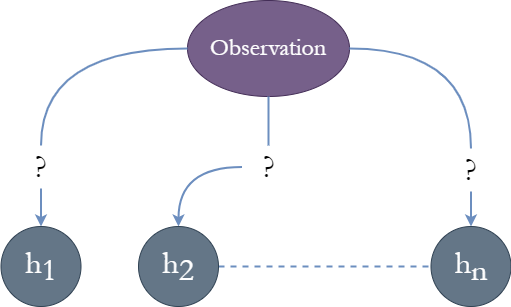

#### Inductive Biases in Machine Learning

In machine learning tasks, we deal with some subset of observations (data points) and the goal is to create a generalization based on them. This generalization should be valid for new unseen data. In other words, the goal is to induce a general rule that works for the whole population of samples based on a limited sample subset.

So we have some set of observations and a set of hypotheses that can be induced based on them. The set of observations is our data and the set of hypotheses are ML algorithms with all the possible parameters that can be learned from this data. Each model can describe training data but provide significantly different results on new unseen data.



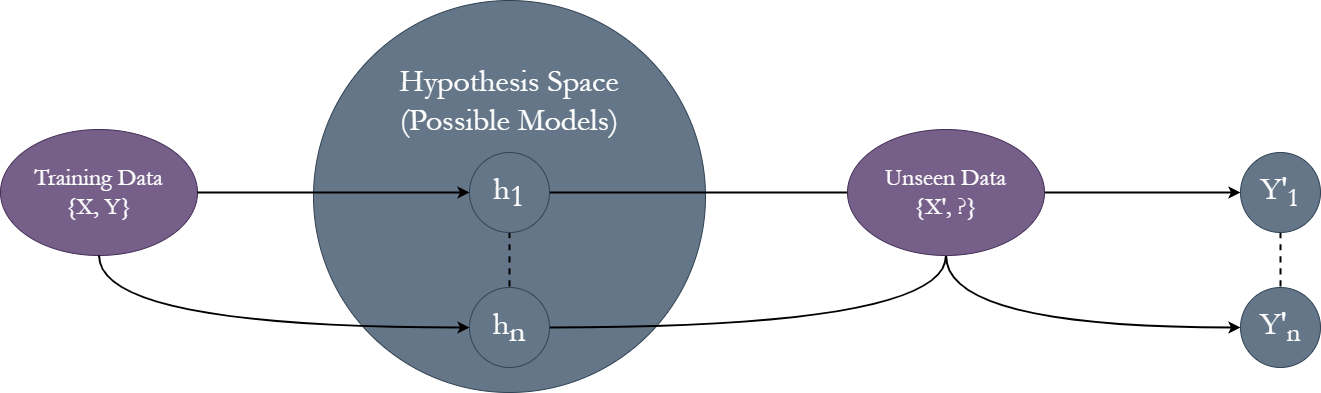

#### Hypothesis Space

There is an infinite set of hypotheses for a finite set of samples. For example, consider the following observations of two points of some single-variable function. It is possible to fit a single linear model and an infinite amount of periodic or polynomial functions that perfectly fit the observations. Given the data, all of that functions are valid hypotheses that perfectly align with observations, and with no additional assumptions, choosing one over another is like making a random guess.

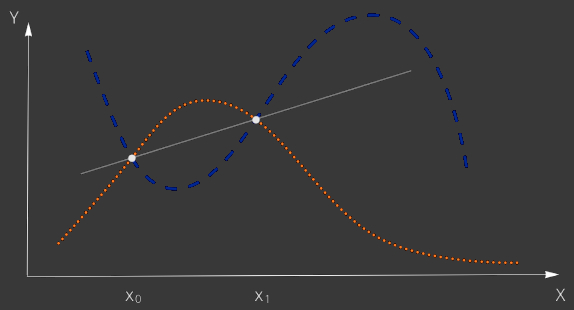

When inferring the hypothesis from the new unseen data, it turns out that most of the complicated functions are inaccurate. However, the linear function appears to be quite accurate, which should be already a familiar concept from a bias-variance tradeoff perspective.

The prioritization of some hypotheses (restriction of hypothesis space) is an inductive bias. So the model is biased toward some group of hypotheses. For the previous example, one can choose a linear model based on some prior knowledge about data and thus prioritize linear generalization.

#### Training Data Impact

As one can see from the previous example, choosing the right induction bias of the model leads to better generalization, especially in a low data setting. The less training data we have, the stronger inductive bias should be to help the model to generalize well. But in a rich data setting, it may be preferable to avoid any induction bias to let the model be less constrained and search through the hypothesis space freely.

#### Inductive Biases in CNNs

This sections examines the main inductive biases inherent to CNNs.

##### Locality

Convolutional layers are designed to operate on a local region of the input data, which allows them to learn patterns that are present in a limited area of the input. This bias can be useful for tasks such as image classification, where local patterns can be indicative of the presence of certain objects.

##### Weight Sharing

Convolutional layers also use weight sharing, which means that the same set of weights is used for all locations in the input data. This implies that the layer is searching for specific patterns (e.g. edges). It can help to reduce the number of parameters in the model and improve its generalization ability.

##### Translation Equivariance

The combination of convolutional layers with weight sharing are also designed to be translation equivariant, meaning that the output of the layer is affected in a predictable way when the input data is translated. This means that if the input data is shifted by a certain amount, the output of the network will also be shifted by a corresponding amount. For example, if an image is translated to the left, the output of a network that is translation equivariant will also be shifted to the left.

Convolutional Neural Networks are not naturally equivariant to some other transformations such as changes in the scale or rotation of the image. Other mechanisms are required to handle such transformations.

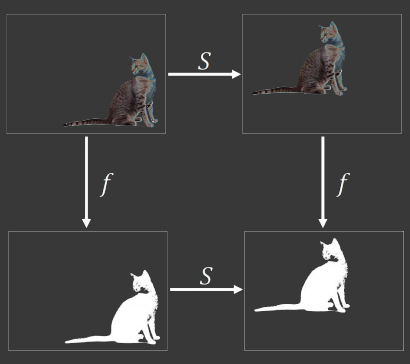

##### Translation Invariance

The pooling layers in convolutional networks make them translationally invariant, meaning that the output of the network remains unchanged if the input data is translated. Translational Invariance is a useful property where the exact location of the object is not required. For e.g if you are building a model to detect faces all you need to detect is whether eyes are present or not, it’s exact position is not necessary. While in segmentation tasks, the exact position is required.

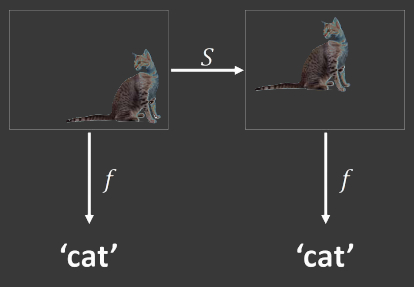

### 1.2 Mel Spectograms

Mel spectrograms are visual representations of audio data that show the spectral content of a sound over time. They are created by applying a Fourier transform to a series of short-term windows of the audio signal and mapping the resulting spectrum onto the Mel scale, a subjective pitch scale based on how humans perceive it.

Mel spectrograms have several properties that make them useful for tasks such as music classification and genre recognition. 
- First, they capture the spectral content of the audio signal, which includes fundamental features such as pitch, timbre, and harmonic structure. 
- Second, they capture the temporal evolution of the audio signal, which is essential for understanding how the spectral content of the sound changes over time. 
- Finally, the Mel scale allows Mel spectrograms to emphasize the spectral features that are most relevant for human perception, making them more effective at capturing the characteristics of a sound that are important for identifying its genre.

Mel spectrograms are common in research on music classification and genre recognition, and they are effective at capturing features of the audio signal that are relevant to these tasks.

### 1.3 Data Augmentation

#### Horizontal Flipping

Horizontally flipping an image is a form of data augmentation that can improve the performance of a model by introducing new, previously unseen variations of the training data. It can improve the model's generalizability to new unseen data by making it learn more robust features not tied to a specific orientation of the image.


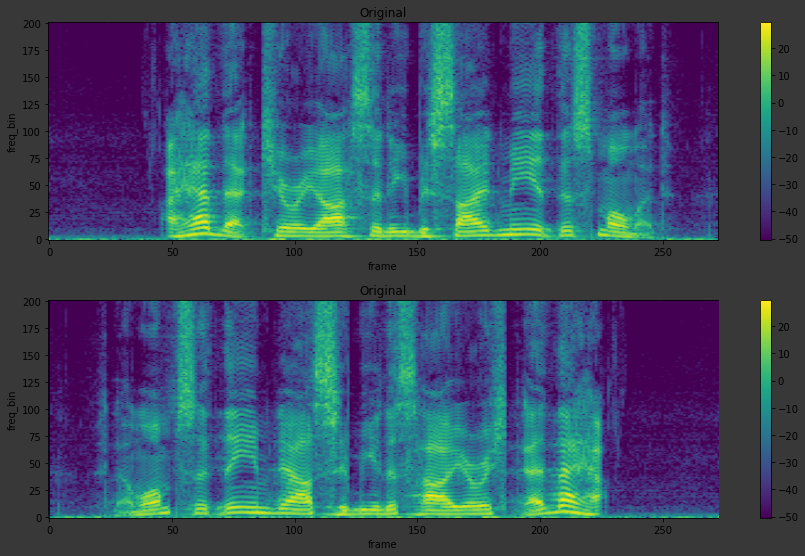

#### Time and Frequency Masking

Time and frequency masking is augmentation techniques where a section of the time or frequency axis of the audio signal is set to zero, effectively cutting out a portion of the sound or a frequency range. They can improve the model's generalizability by exposing it to a wider range of possible signal characteristics, thus, making it less reliant on specific time/frequency-based features of the training data.

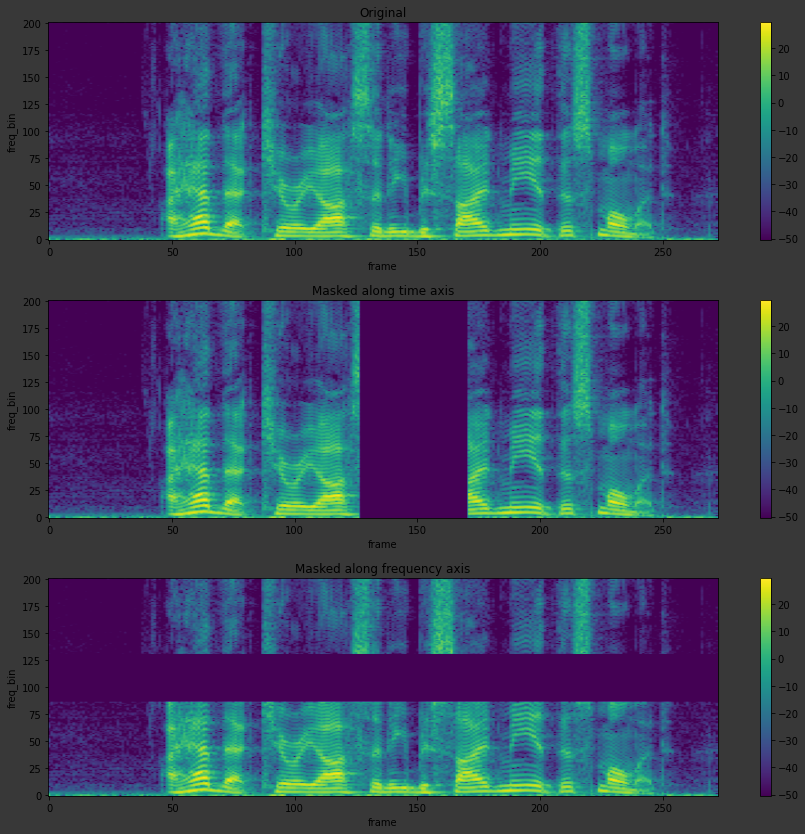

## 2.0 Literature Review

In this section, relevant research and related works on the topic are reviewed.


### 2.1 Attention Is All You Need



#### Pre-Transformer Era

Before transformers, **recurrent neural networks, long short-term memory and gated recurrent neural networks** have been firmly established as the state-of-the-art approaches in sequence modelling and transduction problems such as language modelling and machine translation. 

RNNs played a vital role in the development of machine translation systems. This task is tackled with an **encoder-decoder** or **sequence-to-sequence architecture**, which is suited for situations where the input and output are both sequences of arbitrary length. The encoder encodes the information from the input sequence into a low-dimensional, latent numerical representation: the last hidden state, which is then passed to the decoder to generate the conditioned output sequence.

Although elegant in its simplicity, one weakness of this architecture is that the final hidden state of the encoder creates an **information bottleneck**: it has to represent the meaning of the whole input sequence because this is all the decoder has access to when generating the output. This is especially challenging for long sequences, where information at the start of the sequence might be lost in the process of compressing everything to a single, fixed representation. Fortunately, there is a way out of this bottleneck by allowing the decoder to access all of the encoder’s hidden states. The general mechanism for this is called attention, a key component in many modern neural network architectures.

**Attention** mechanisms have become an integral part of sophisticated sequence modelling and transduction models in various tasks, allowing the modelling of dependencies without regard to their distance in the input or output sequences. The main idea behind attention is that instead of producing a single hidden state for the input sequence, the encoder outputs a hidden state at each step that the decoder can access. However, simultaneously using all the states would create a huge input for the decoder, so some mechanism is needed to prioritize which to use. This is where attention comes in: it lets the decoder assign a different amount of weight, or “attention,” to each of the encoder states at every decoding time step.

Although attention enabled the production of much better translations, there was still a major shortcoming with using recurrent models for the encoder and decoder: the computations are inherently sequential and unparallelizable across the input sequence. 

In 2017, researchers at Google published a paper called [Attention Is All You Need](https://arxiv.org/abs/1706.03762) that proposed a novel neural network architecture for sequence modelling. Dubbed the **Transformer**, this architecture introduced a new modelling paradigm: dispense with recurrence altogether and instead rely entirely on a particular form of attention called self-attention. It outperformed recurrent neural networks on several natural language processing (NLP) tasks, including machine translation and language modelling. Since then, the Transformer architecture has been widely adopted as the de-facto model for NLP and has achieved state-of-the-art results on various NLP tasks.

#### Transformer Architecture

Transformers follow the encoder-decoder structure. The encoder maps an input sequence of symbol representations $(x_1,...,x_n)$ to another of contextual representations $z=(z_1,...,z_n)$. Given z, the decoder generates an output sequence $(y_1,...,y_m)$ of symbols one element at a time. At each step, the model is auto-regressive, consuming the previously generated symbols as additional input when generating the next.

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of the following figure, respectively.

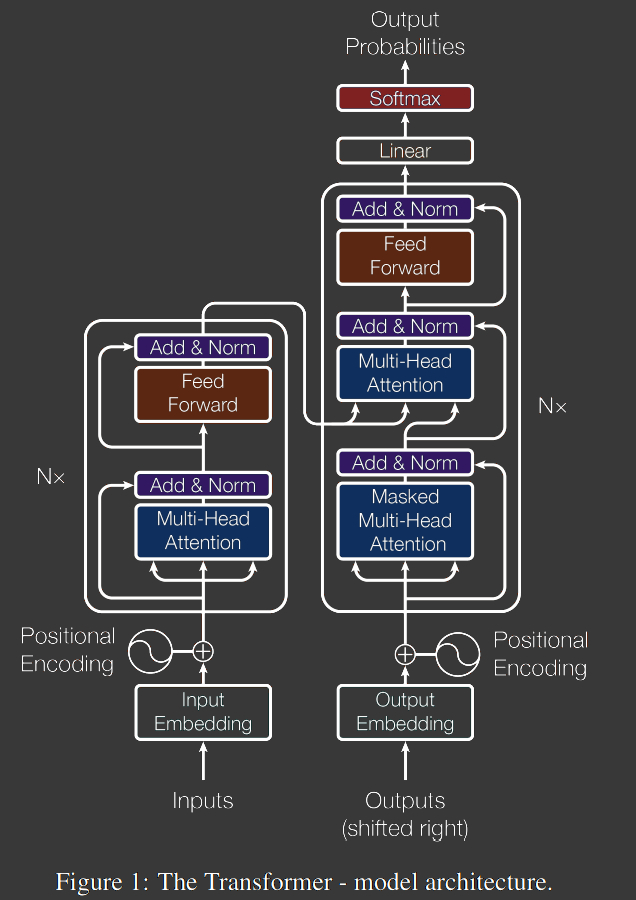

In the following sections, this architecture is dissected and explained in detail.

##### Input Embedding

In natural language processing, the goal of language representation is to encode natural language (terms or documents) in a vector space where similar vectors correspond to similar pieces of text, as shown in the figure below. Thus, when processing images, the aim is to map them into a vector space where similar images have similar corresponding vectors. The figure below shows that increasing the brightness of an image, results in the same vector of the original image with a larger magnitude.



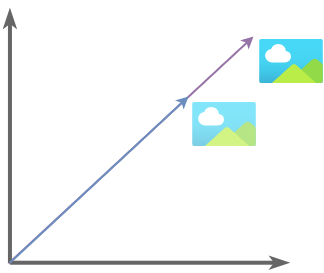

These embeddings are learned through self-supervision on a large dataset on a dummy task. This idea was first proposed in the task of neural language modelling when Bengio et al. (2003) showed that a neural language model (a neural network that learned to predict the next word from previous ones) could use the next word in running text as its supervision signal, and could be used to learn an embedding representation for each word as part of doing this prediction task.

##### Positional Embedding

Transformer models rely solely on attention. Transformers do not process the input sequentially in order but in parallel. The lack of recurrence/convolutions means that the model requires a positional encoding vector of the tokens to have information regarding the relative position of the tokens in the sentence.

Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position in a sentence. So after adding the positional encoding, tokens will be closer to each other based on the similarity of their meaning and their position in the d-dimensional space.

As shown in the figure below, the initial token embedding vectors for `Queen` and `King` are close to each other due to their semantic similarity. By adding the positional encoding vector identifying the order of the tokens, the `Queen` token is slightly shifted towards the tokens cluster with similar position in sentences

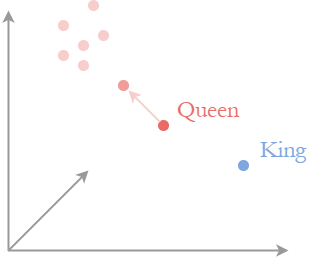

These positional encodings must satisfy the following properties:

- Every position should have the same positional encoding vector, irrespective of the input.

- Their magnitude should not be too large; otherwise, the shift becomes too strong, causing the positional similarity to overshadow the semantic one.

- Their magnitude should not be too small; otherwise, the shift becomes too weak, causing the semantic similarity to overshadow the positional one.


A straightforward positional encoding function might be a simple linear relationship between tokens' positions and their corresponding positional encoding. However, this becomes problematic with long sequences as it violates the desired property of having bounded positional encodings.

Meanwhile, the sine and cosine functions are bounded and periodically return to values in the range $[−1,1]$. Additionally, they are defined up to infinity, so they work with longer sequences (unlike the sigmoid function, which has little variability for larger domain values).

Shown below are the two functions across a single dimension.

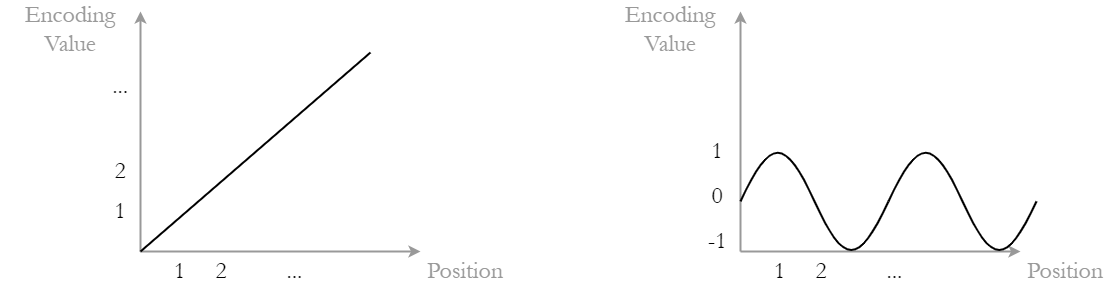

The issue with this sine function is that its periodicity will give tokens at different positions the same encoding value. A naive solution would be to use a wave with such a low frequency that even with the longest possible sequence, the values would not repeat. This violates the desired property of having encoding vectors that aren't too small. However, using sines and cosines of different frequencies across different dimensions solves this problem.

The original transformer paper uses sine and cosine functions of different frequencies approach:

<center><h4>$PE(pos, 2i)=sin(pos/10000^{2i/d_{model}})$</h4></center>
<center><h4>$PE(pos, 2i+1)=cos(pos/10000^{2i/d_{model}})$</h4></center>

where $pos$ is the position and $i$ is the dimension. 


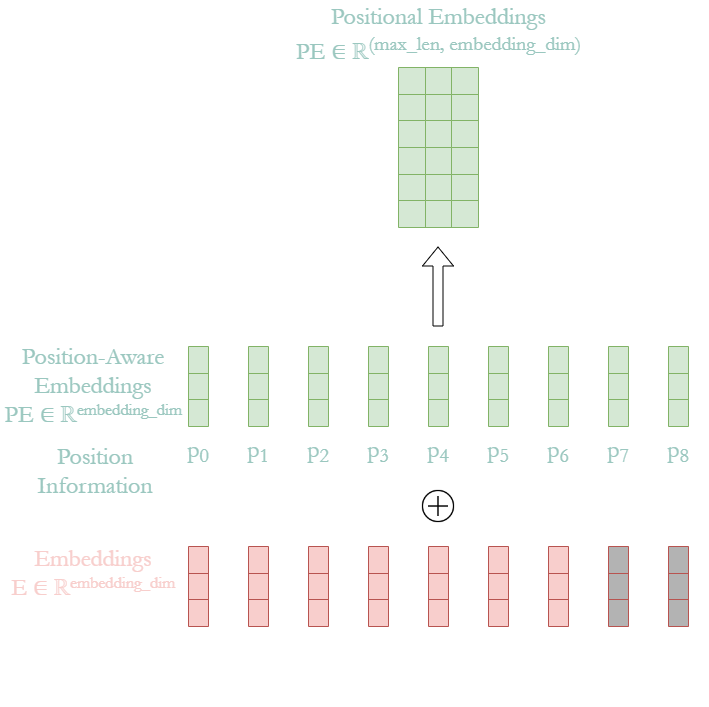

While the paper produces the final embeddings by an addition operation between the semantic and positional vectors, there are other approaches to concatenating the two vectors. This increases the embedding space dimensionality so that the semantic dimensions are orthogonal to the positional ones. Thus, avoiding any mix-up between the two vectors. However, this comes at the cost of more memory, parameters, and computation time.

Finally, some efforts have been done for models to self-learn the positional encodings. However, the learned encodings have not been able to consistently outperform their handcrafted counterparts.

##### Encoder and Decoder Stacks

###### Encoder

- The encoder consists of a stack of $N = 6$ identical layers.
- Each layer has the following two sub-layers.
  - A multi-head self-attention mechanism.
  - A position-wise fully connected feed-forward network.

- Residual connections are employed around each of the two sub-layers, followed by layer normalization. That is, the output of each sub-layer is $LayerNorm(x + Sublayer(x))$, where $Sublayer(x)$ is the function implemented by the sub-layer
itself. To facilitate these residual connections, all sub-layers in the model and the embedding ones produce outputs of dimension $d_{model} = 512$.

###### Decoder

- The decoder also consists of a stack of $N = 6$ identical layers. 
- In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack.
- Similar to the encoder, residual connections are employed around each of the three sub-layers.
- The self-attention sub-layer in the decoder stack is modified to prevent positions from attending to subsequent ones. This masking, combined with the fact that the output embeddings are offset by one, ensures that the predictions for a position $i$ can depend only on the known outputs at positions less than $i$.

##### Attention

###### Attention As Search

YouTube is a giant database of many videos. The goal is to find/attend to a video. The first step is specifying some query $q$ in the search bar. What can occur next is as follows: for every video in the database, extract some "key" information $k$, which can be the video's title.

At this point, there's a query $q$ and a set of keys $(k_1, ..., k_n)$. An engine performs the search process by computing a similarity function between the query and each of the keys. The output of this computation is an attention mask that provides attention weighting to every key according to the query.

The final step is to extract the actual video based on the attention weights. This is called the value $v$. 

###### Intution Behind Self-Attention

Self-attention is the ability of a model to take input and "attend" to the most important parts of that input (concerning a query).

Consider the following image:

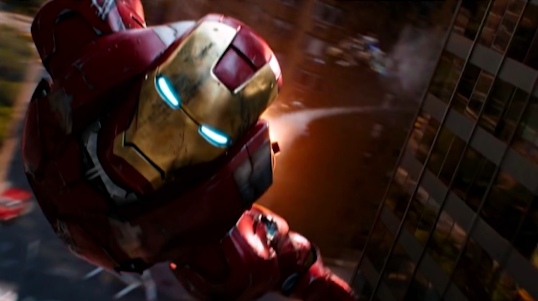

Assuming our query is "superhero", then the self-attention mechanism should attend to the pixels that make up iron man:

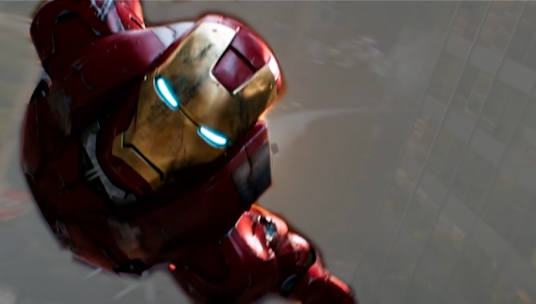

Finally, multi-head attention refers to the ability to attend to different things in the input as shown below:

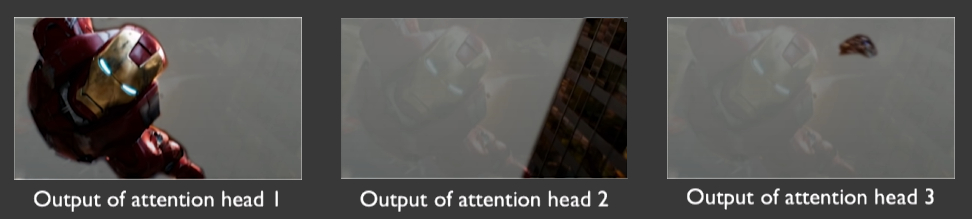

###### Scaled Dot Product

The attention function used by a transformer takes three input matrices: $Q$ (Queries), $K$ (Keys), and $V$ (Values). The equation used to calculate the attention vector is:

<center><h1>$Attention(Q, K, V)=softmax(\frac{QK^T}{\sqrt{d_k}})V$</h1></center>

The decoder's self-attention step employs a mask layer. The masking zeroes out the part of the decoder's input that the model shouldn't have access to yet, and large negative inputs to softmax are near zero in the output. This is achieved by multiplying the masked weights by -1e9 (close to negative infinity). This is because the mask is summed with the scaled matrix multiplication of $Q$ and $K$ and is applied immediately before a softmax. The goal is to zero out the part 

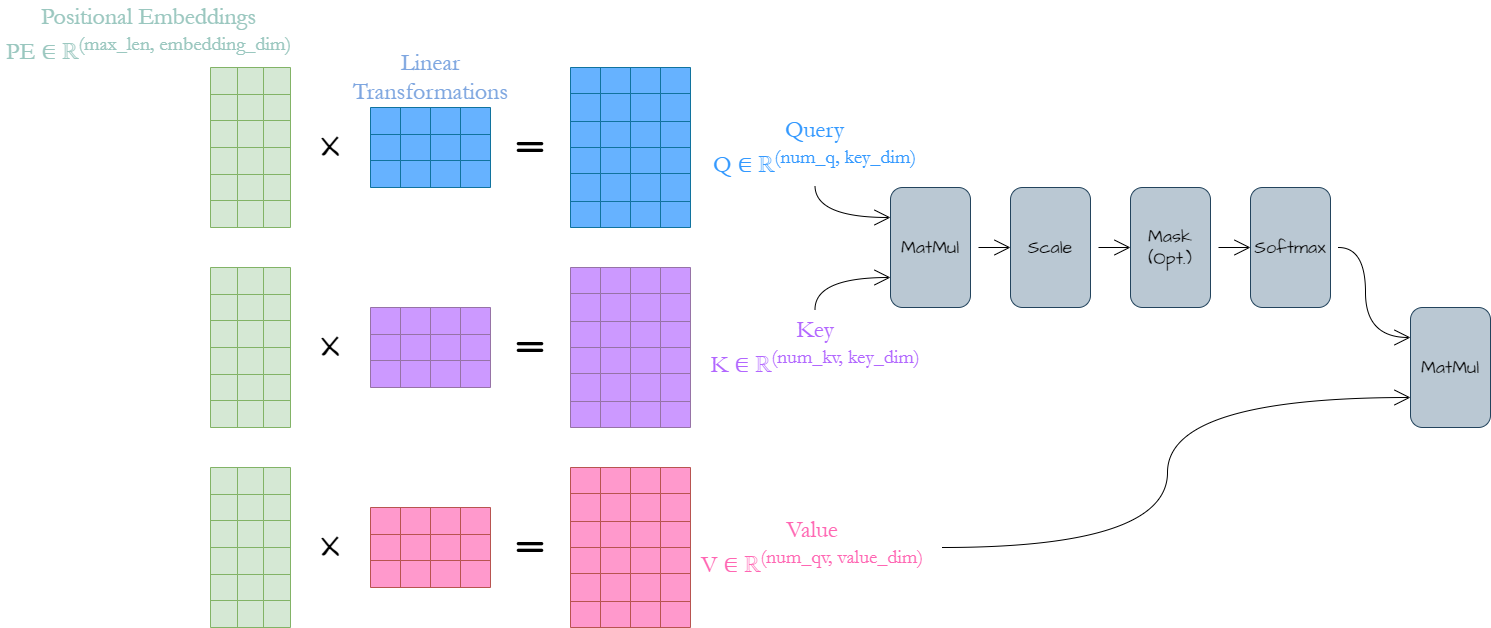

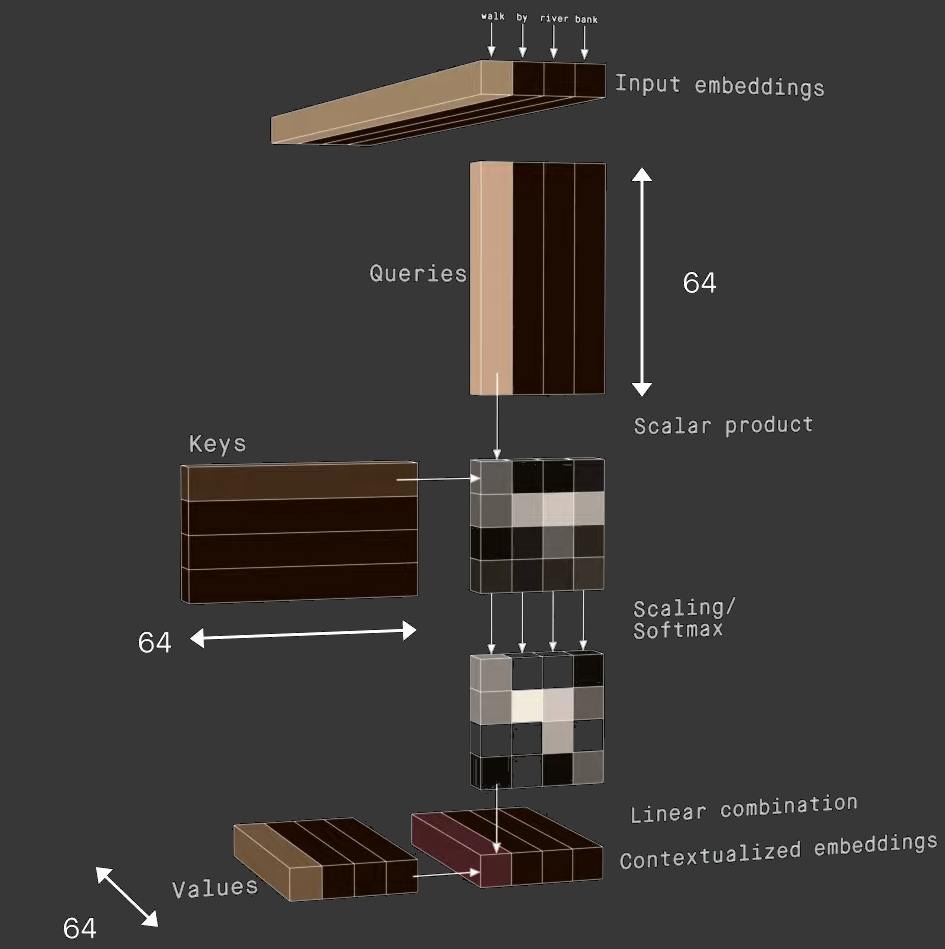

###### Multi-Head Attention

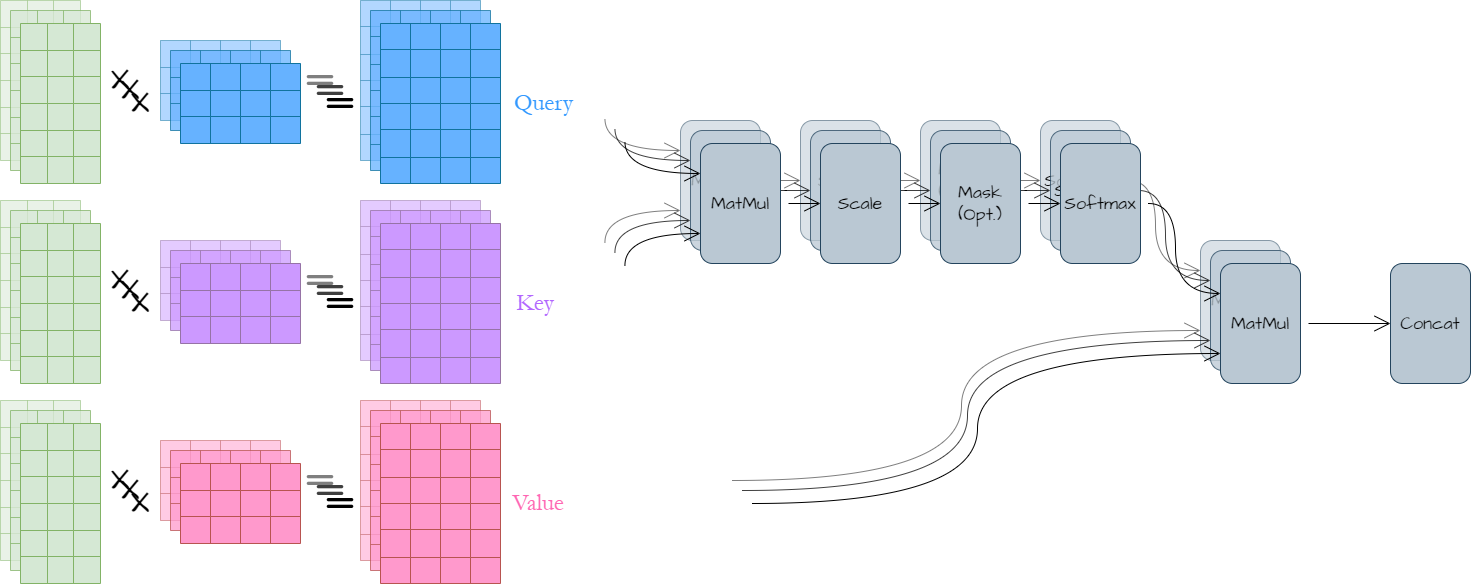

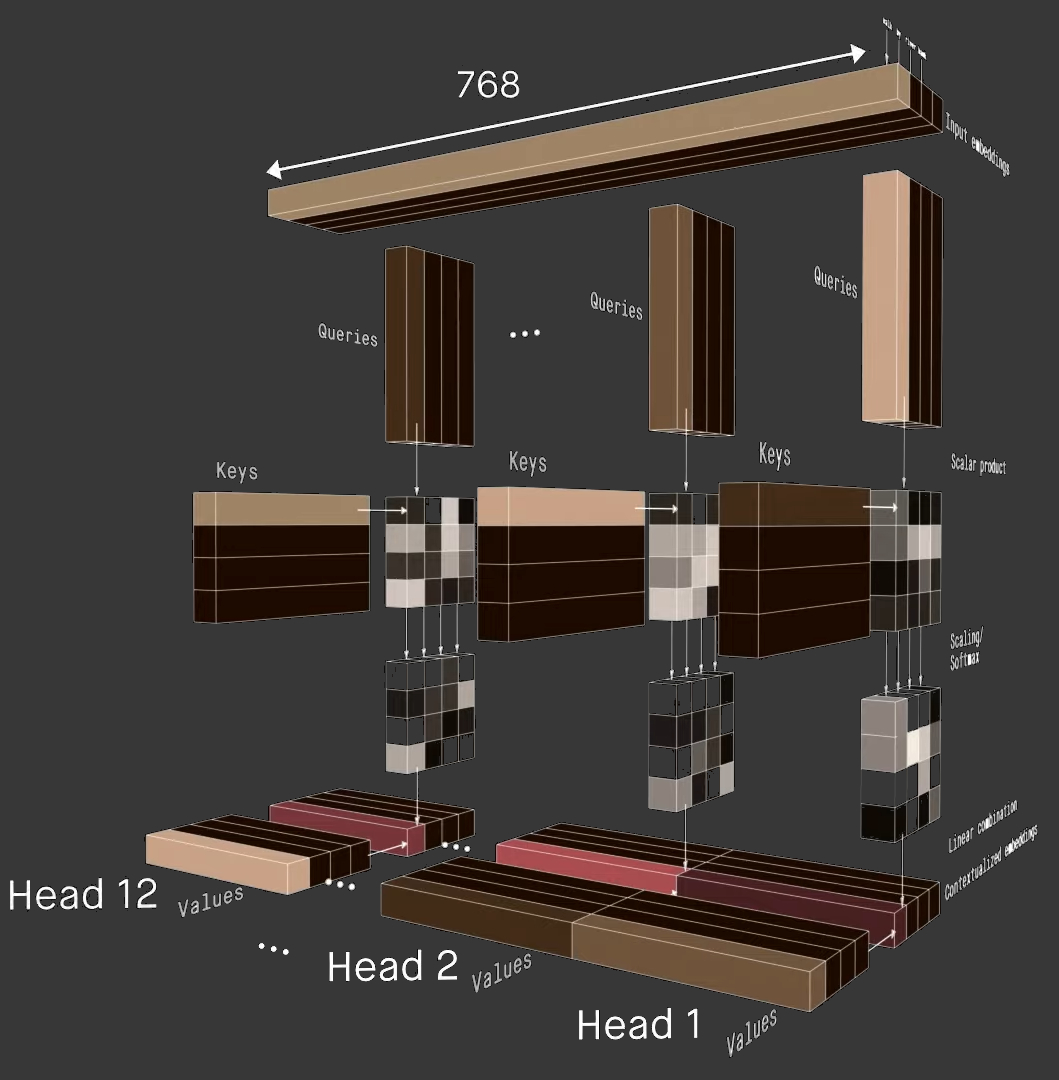

##### Add & Norm Layers

The Add & Norm layer consists of two steps:

- Addition: 

  The first step is to add the weighted sum of the input sequence elements to the input itself, element-wise. 

- Normalization: 

  The second step is to normalize the result of the addition step via a normalization function, such as layer or batch normalization, which scales and shifts the values of the input so that they have zero mean and unit variance.

The Add & Norm layer is important because it helps to stabilize the training of the transformer model by normalizing the inputs and preventing the gradients from exploding or vanishing. It also helps improve the model's generalization and makes it less sensitive to the scale of the input data.

##### Position-Wise Dense Layers

Each layer in the encoder and decoder contains a fully connected feed-forward network, which is applied to each position separately and identically. This dense network consists of two linear transformations with a ReLU activation in between.

$FFN(x) = max(0, xW_1 + b_1)W_2 + b_2$

### 2.2 BERT: Pre-training of Deep Bidirectional Transformers

[Bidirectional Encoder Representations from Transformers (BERT)](https://arxiv.org/abs/1810.04805) is a language representation transformer-based model released by google in late 2018. It is designed to pre-train deep bidirectional representations from an unlabeled text by jointly conditioning on both left and right contexts in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks.

The paper shows:

- The importance of bidirectional pre-training for language representations.
- That pre-trained representations reduce the need for many heavily-engineered task-specific architectures. BERT is the first finetuning-based representation model that achieves state-of-the-art performance on a large suite of sentence-level and token-level tasks, outperforming many task-specific architectures.

##### BERT Vs the Original Transformer

BERT is an encoder-based language model, i.e., it represents the statistical relationships of the words in a language. Hence the "Representations" in its name, Bidirectional Encoder Representations from Transformers.

BERT is trained in an unsupervised way for representation learning, and then it is fine-tuned on downstream tasks in a supervised fashion (i.e., transfer learning). On the other hand, the original transformed was not originally conceived to be a language model but to solve sequence transduction tasks (i.e., converting one sequence to another, such as machine translation) without recurrent connections (or convolutions) but only attention.

##### Input/Output

###### Special Tokens

**`[SEP]`**

A special `[SEP]` token must be appended at the end of every sentence. 

This token is an artifact of two-sentence tasks, where BERT takes two separate sentences and determines something (e.g., can the answer to the question in sentence A be found in sentence B?). 

**`[CLS]`**

For classification tasks, a `[CLS]` token is prepended to the beginning of every sentence.

This token has special significance. BERT consists of 12 Transformer-Encoder layers. Each takes in a list of token embeddings and produces the same number at the output. A classifier takes the output embedding of the first embedding (corresponding to the [CLS] token) at the final BERT layer.

> From the BERT paper: "The first token of every sequence is always a special classification token ([CLS]). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks."

**`[PAD]`**

BERT handles sentences of varying constraints by forcing all sentences' tokens to be padded/truncated into a single, fixed length (maximum sentence length supported by BERT is 512). Padding is done by a special `[PAD]` token, which corresponds to index 0 in BERT's vocabulary. Additionally, an attention mask should specify which tokens are padding and which aren't.

###### Input Representation

For BERT to handle various downstream tasks, the input representation should unambiguously represent both a single sentence and a pair of sentences. Thus, a “sequence” refers to the input token sequence to BERT, which may be a single or two sentences packed together. BERT uses WordPiece embeddings with a vocabulary size of $30,000$ tokens. 

The first token of every sequence is always a classification token `[CLS]`. Sentence pairs are packed into a single sequence and differentiated in two ways. First, they're separated with a separation token `[SEP]`. Second, an embedding to every token is added, indicating whether it belongs to sentence A or sentence B.

###### Output Representation

The final hidden state corresponding to the classification `[CLS]` token is used as the aggregate sequence representation $C \in R^H$ for classification tasks. The final hidden vector of the $i^{th}$ input token is $T_i \in R^H$.



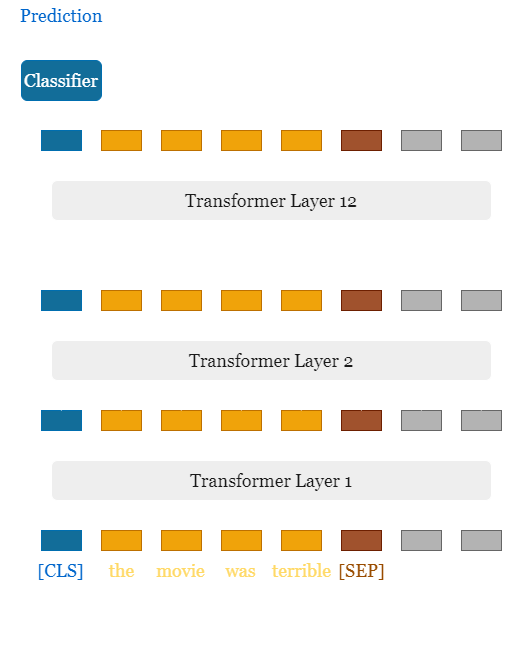

##### Pre-Training Paradigm

1. **Quicker Development**

    * The pre-trained BERT model weights already encode information about our language. As a result, it takes much less time to train the fine-tuned model as most of the work at the bottom layers is already done.

    Since the bottom layers are already extensively trained, only slightly tuning them while using their output as features for the classification task is needed. The authors recommend only 2-4 epochs of training for fine-tuning BERT on a specific NLP task (compared to the hundreds of GPU hours to train the original BERT model or an LSTM from scratch!). 

2. **Less Data**

    * A drawback of NLP models built from scratch is that they often require a prohibitively large dataset to train our network to a reasonable accuracy. This method allows us to fine-tune our task on a much smaller dataset than would be required in a model built from scratch. 

3. **Better Results**

    * This simple fine-tuning procedure (typically adding one fully-connected layer on top of BERT and training for a few epochs) achieves state-of-the-art results with minimal task-specific adjustments for a wide variety of tasks: classification, language inference, semantic similarity, question-answering, and others. Rather than implementing custom and sometimes obscure architectures that work well on a specific task, simply fine-tuning BERT is shown to be a better (or at least equal) alternative.

### 2.3 An Image Is Worth 16x16 Words

In 2020, Google published a paper titled [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929). In this paper, they propose the Vision Transformer (ViT), a competitive alternative to convolutional neural networks (CNNs) that are currently state-of-the-art in computer vision.

#### Inspiration From NLP

As previously mentioned, transformers (Attention Is All You Need, 2017) have become the standard model in natural language processing (NLP). The dominant approach is to pre-train on a large text corpus and then fine-tune it on smaller task-specific datasets. Thanks to Transformers’ computational efficiency and scalability, it has become possible to train models of unprecedented size with over 100B parameters. With the models and datasets growing, there is still no sign of saturating performance.

In computer vision, however, convolutional architectures remain state-of-the-art. Inspired by the Transformer scaling successes in NLP, the paper experimented with applying a standard Transformer directly to images with the fewest possible modifications from the original transformer architecture. The results show that this reliance on CNNs is unnecessary and that a pure transformer applied directly to sequences of image patches can perform very well on image classification tasks.

#### Vision Transformers Vs CNNs

One key difference between Vision Transformers (ViTs) and Convolutional Neural Networks (CNNs) is the way they process input images. CNNs use kernels or filters to aggregate local information in each layer and then pass this information to the next layer with a larger field of view. Thus, CNNs process information hierarchically, with each layer building on the activations processed by the previous layer, starting with a small field of view and gradually expanding it as they process the image. In contrast, ViTs take the image as a sequence of patches and flatten them into an embedding vector space using a linear transformation. They use self-attention mechanisms to process information parallely, which allows them to have a large field of view from the beginning, overcoming the receptive field limitation of CNNs.

Unlike CNNs, ViTs are very data-hungry due to their freedom to look everywhere in the image from the beginning. It is very unfocused at first and requires a large amount of data to learn how to focus and what to focus its attention on to make correct predictions. ViTs can find original and unexpected ways to look at the image data because no component in the architecture instructs the model on how to process the image. However, CNNs are focused from the beginning towards a local view by the convolution layers. While this can be a limitation, it means CNNs need significantly less training data because the model doesn't have to learn how to examine the image and how and on what to focus.

Therefore, despite their recent success, it is still unclear whether ViTs will completely replace CNNs in image recognition. CNNs have been the dominant architecture in this field for many years and are highly effective for computer vision tasks. Additionally, ViTs have some limitations, such as their high computational requirements, large number of parameters, and the need for huge amounts of data. Both architectures will likely continue to be used in different scenarios, depending on the specific needs of the task.



#### Vision Transformer Architecture

The original transformer receives as input a 1D sequence of token embeddings. To handle 2D images, the image $x \in R^{W \times H \times C}$ is reshaped into sequence of flattened 2D patches $x_p \in R^{N \times (P^2 \cdot C)}$, where

- $(H, W)$ is the resolution of the input image.
- $C$ is the number of channels.
- $(P, P)$ is the resolution of each image patch.
- $N$ is the number of image patches $N = \frac{HW}{P^2}$, which is also the effective input sequence length for the transformer.

The transformer uses constant latent vector size $D$ through all its layers, so the patches are flattened and mapped to $D$ dimensional vectors with a trainable linear projection. The output of this projection is referred to as patch embeddings.

Similar to BERT’s `[class]` token, a learnable embedding is prepended to the sequence of embedded patches, whose state at the output of the Transformer encoder serves as the image representation. Both during pre-training and fine-tuning, a classification head is attached to it. The classification head is implemented through a multi-layer perceptron with one hidden layer at pre-training time and through a single linear layer at a fine-tuning time.

**Position embeddings** are added to the patch embeddings to retain positional information. ViT uses learnable 1D position embeddings since no significant performance gains were observed using more advanced 2D-aware position embeddings. The resulting sequence of embedding vectors serves as input to the encoder.


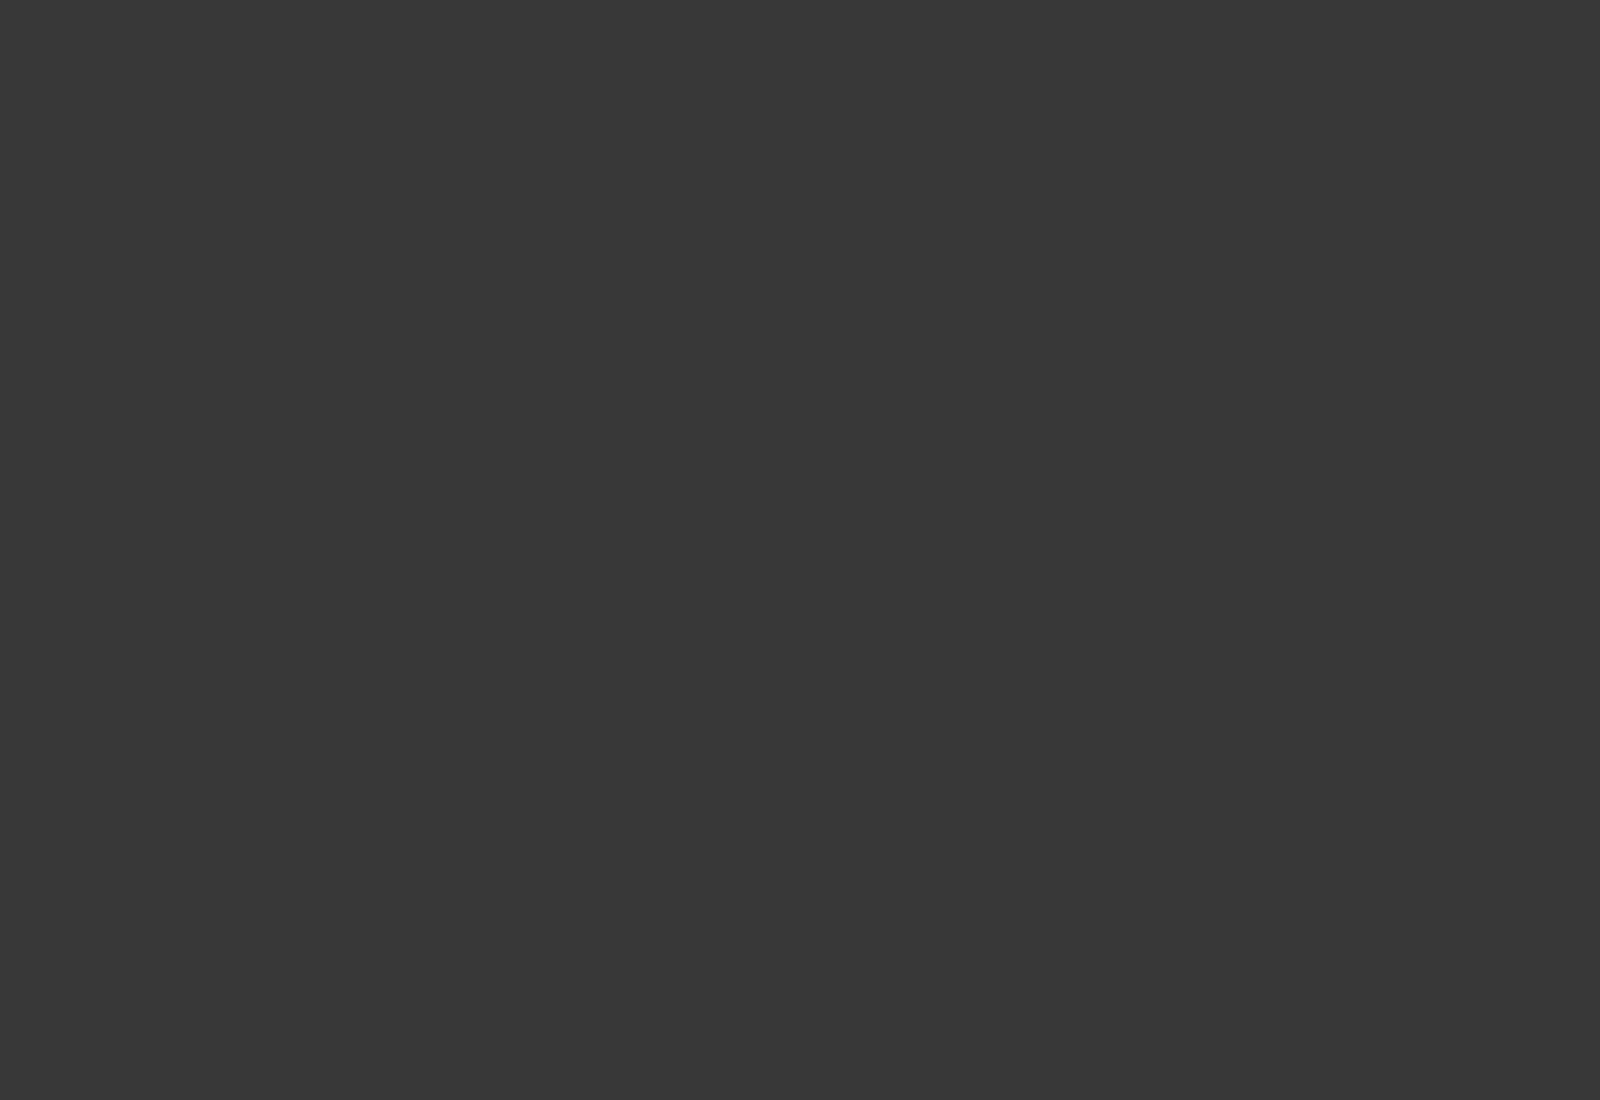

#### Lack of Inductive Biases

Transformers lack some of the inductive biases inherent to CNNs, such as translation equivariance and locality, and therefore do not generalize well
when trained on insufficient amounts of data. However, the picture changes if the models are trained on larger datasets (i.e., hundreds of millions of images). The paper finds that large scale training trumps inductive bias. 

## 3.0 Methodology

The task of music genre classification consists of assigning a genre label to a piece of music based on its content. One way to approach this task is to use a visual representation of the audio signal, such as a Mel spectrogram, which captures the spectral content of the sound over time. This representation can then be fed into a supervised machine-learning model, such as a ViT (Vision Transformer).

To train the ViT model for music genre classification, a dataset of labelled visual representations of audio is needed. The model can be fine-tuned on this dataset using a supervised learning approach, in which the correct genre label is provided for each representation. During training, the model will learn to map the features extracted from the representation to the correct genre label.

Once the ViT model has been fine-tuned, it can be evaluated on a separate test set of visual representations to measure its performance. The accuracy of the model's predictions is used as a metric to assess its effectiveness.

Finally, an end-to-end pipeline using the fine-tuned ViT model is constructed to convert an audio signal into its visual representation, feed it into the trained ViT model, and output a predicted genre label. The model could then be used to classify the genre of new, unseen pieces of music by processing their visual representations and outputting a predicted genre label.

### 3.1 Setup and Imports

In [1]:
# Install the Hugging Face libraries
!pip install -q transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.2 MB/s eta 0:00:00


In [18]:
# Load the Dataset
import os
import zipfile
import urllib.request

# Preprocess the Dataset
import random
import numpy as np
from PIL import Image

# ViT
import evaluate
from datasets import load_dataset, concatenate_datasets, DatasetDict
from transformers import TrainingArguments, Trainer
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Image Augmentation
import torch
from torchvision.transforms import ToTensor, ToPILImage, RandomHorizontalFlip
from torchaudio.transforms import TimeStretch, TimeMasking, FrequencyMasking

# Matplotlib
import matplotlib.pyplot as plt

plt.rcdefaults()
plt.rcParams["axes.facecolor"] = "#383838"
plt.rcParams["figure.facecolor"] = "#383838"

FONT_COLOUR = "white"
plt.rcParams["text.color"] = FONT_COLOUR
plt.rcParams["xtick.color"] = FONT_COLOUR
plt.rcParams["ytick.color"] = FONT_COLOUR
plt.rcParams["axes.edgecolor"] = FONT_COLOUR
plt.rcParams["axes.labelcolor"] = FONT_COLOUR

### 3.2 Load the Dataset

The GTZAN image dataset is a collection of 1000 images of music tracks, evenly distributed among 10 genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock. 

The data directory for the GTZAN dataset is organized as follows:

```
gtzan
├── blues
│   ├── blues.00001.jpg
│   ├── blues.00002.jpg
│   ├── ...
│   └── blues.00100.jpg
├── classical
│   ├── classical.00101.jpg
│   ├── classical.00102.jpg
│   ├── ...
│   └── classical.00200.jpg
├── ...
└── rock
    ├── rock.00901.jpg
    ├── rock.00902.jpg
    ├── ...
    └── rock.01000.jpg
```




In [3]:
# Specify the dataset URL and directory
file_name = "dataset.zip"
dataset_url = "https://rb.gy/pk3vu5"

# Download and extract the dataset once
if not os.path.exists(file_name):

    # Download the file from the URL
    urllib.request.urlretrieve(dataset_url, file_name)
    print("Dataset Downloaded.")

    # Unzip the file
    with zipfile.ZipFile(file_name, "r") as zip_ref:
        zip_ref.extractall()
        print("Dataset Extracted.")
else:
    print("Dataset Ready.")

Dataset Downloaded.
Dataset Extracted.


### 3.3 Data Augmentation

In [4]:
original_ds_directory = "/content/dataset"
augmented_ds_directory = "/content/augmented"

def save_img(img, img_path, augmentation):
    to_pil(img).save(f"{img_path[:-4]}_{augmentation}.png".replace("dataset", "augmented"))

# Instanciate augmentation objects
to_tensor = ToTensor()
to_pil = ToPILImage()
horizontal_flip = RandomHorizontalFlip(1)
time_mask = TimeMasking(time_mask_param=100)
freq_mask = FrequencyMasking(freq_mask_param=100)

In [5]:
if not os.path.exists(augmented_ds_directory):
    os.mkdir(augmented_ds_directory)

# Iterate over all genres in root
for genre in os.listdir(original_ds_directory):

    original_genre_directory = f"{original_ds_directory}/{genre}"

    # Create a corresponding genre directory if it doesn't exist
    new_genre_directory = f"{augmented_ds_directory}/{genre}"
    if not os.path.exists(new_genre_directory):
        os.mkdir(new_genre_directory)

    # Iterate over all images in genre
    for image_filename in os.listdir(original_genre_directory):
     
        # Construct the full image path
        image_path = f"{original_genre_directory}/{image_filename}"
     
        # Load the image as a PyTorch tensor
        img_original = to_tensor(Image.open(image_path))

        # Horizontal Flipping
        img_flipped = horizontal_flip(img_original)

        # Time Masking
        img_time_masked = time_mask(img_original)

        # Frequency Masking
        img_freq_masked = freq_mask(img_original)

        # Save the images
        save_img(img_original, image_path, "0_original")
        save_img(img_flipped, image_path, "1_flipped")
        save_img(img_time_masked, image_path, "2_time_masked")
        save_img(img_freq_masked, image_path, "2_freq_masked")

The dataset is loaded into a `🤗Dataset`. In the Hugging Face library, a `🤗Dataset` object is a high-level data structure that represents a collection of data, typically used for training and evaluating transformer models. It provides a convenient way to iterate over the data, as well as apply transformations to the data on the fly, such as shuffling, filtering, and batching.

In [6]:
# Load the dataset
# dataset_directory = "/content/dataset"
dataset_directory = "/content/augmented"
ds = load_dataset("imagefolder", data_dir=dataset_directory)
ds

Resolving data files:   0%|          | 0/3996 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-ace9b3ea5e482b56/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3996
    })
})

### 3.4 Split the Dataset

This section splits the dataset so it consists of train, validation, and test subsets. Each data point from the dataset has the following two keys:

- `image`: A `PIL` image object.
- `label`: An integer representation of the label.

In [7]:
# Split the original dataset into "train" and "test" sets (80%-20%)
ds_train_x = ds["train"].train_test_split(test_size=0.2)

# Split the "test" set into "val" and "test" (50%-50%)
ds_x = ds_train_x["test"].train_test_split(test_size=0.5)

# Create a new dataset with all 3 splits
ds = DatasetDict({
    "train": ds_train_x["train"],
    "val": ds_x["train"],
    "test": ds_x["test"]
    })

ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3196
    })
    val: Dataset({
        features: ['image', 'label'],
        num_rows: 400
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 400
    })
})

### 3.5 Preprocess the Dataset

When ViT models are trained, specific transformations are applied to images fed into them. To make sure the correct transformations are applied `🤗ViTFeatureExtractor` is used and initialized with a configuration that was saved along with the pretrained model. It takes an image as input and returns a dictionary containing `pixel_values`, which is the numeric representation to be passed to the model. By default, it's a NumPy array, but it can be returned as a tensor if the `return_tensors="pt"` argument is added.



In [8]:
# Load the pre-trained ViT model from a checkpoint
vit_checkpoint = "google/vit-base-patch16-224-in21k"

# Instantiate a ViTFeatureExtractor object
vit_feature_extractor = ViTFeatureExtractor.from_pretrained(vit_checkpoint)

# Define a function that extracts features from a batch of images
def transform(batch):
  
  # Extract the images from the batch
  images = [x for x in batch["image"]]

  # Use the feature extractor to get the image features
  inputs = vit_feature_extractor(images, return_tensors="pt")
  
  # Add the labels back to the image features
  inputs["label"] = batch["label"]
  return inputs

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

It is possible to call `ds.map()` and apply a transformation to every example at once, but this can be slow, especially if using a larger dataset. A more efficient approach is to apply a transform to the dataset. Transforms are only applied to the instances when they are indexed.

To use `ds.with_transform()`, it is necessary to define a preprocess function that accepts a batch of data.

In [9]:
# Apply the transform
ds_preprocessed = ds.with_transform(transform)

### 3.6 Fine-Tuning ViT

#### Data Collation

In mini-batch training, a model is trained using a subset of the training data rather than the entire dataset. This subset is called a mini-batch. Training a model using mini-batches allows the model to be updated more frequently, which can lead to faster convergence.

Data collation refers to the process of combining multiple data instances into a single mini-batch. This is typically done using a `collate` function, which is passed to a `DataLoader` object in PyTorch. The `collate` function takes a list of data instances and combines them into a single mini-batch, which is then returned as a single data object (e.g., a dictionary).

In [10]:
# Define a function to collate data in batches
def collate(batch):

  # Extract the pixel values and labels from the batch
  pixel_values = [x["pixel_values"] for x in batch]
  labels = [x["label"] for x in batch]

  # Stack the pixel values and convert the labels to a tensor
  return {
      "pixel_values": torch.stack(pixel_values),
      "labels": torch.tensor(labels)
  }

#### Evaluation Metric

This code defines a function called `compute_metrics` that takes a batch of data as input and returns the computed metric for that batch. The batch of data is passed in as an object which has both the  `predictions` and `label_ids` fields.

- The `predictions` field is assumed to be a 2D array of predicted labels, where each row corresponds to a single example and each column corresponds to a class. 
- The `label_ids` field is assumed to be a 1D array of ground truth labels, where each element corresponds to a single example.

The `compute_metrics` function uses the `load_metric` function to load the "accuracy" metric, and then calls the compute method on this metric, passing in the predictions and `label_ids` as arguments. The computed metric is then returned by the function.

In [11]:
# Load the accuracy metric
metric = evaluate.load("accuracy")

# Define a function to compute the metrics for a given batch of data
def compute_metrics(p):

  # Extract the predictions and labels from the data
  predictions = np.argmax(p.predictions, axis=1)
  labels = p.label_ids
  
  # Compute the metric using the predictions and labels
  return metric.compute(predictions=predictions, references=labels)

#### Model Creation

In [12]:
# Get the list of labels from the dataset
labels_id_list = ds_x["train"].features["label"].names

# Initialize the model with the checkpoint, number of labels, and label maps
model = ViTForImageClassification.from_pretrained(
    vit_checkpoint,
    num_labels=len(labels_id_list),
    id2label={str(i): c for i, c in enumerate(labels_id_list)},
    label2id={c: str(i) for i, c in enumerate(labels_id_list)},
    ignore_mismatched_sizes=True
)

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Model Training

In [13]:
batch_size = 64

# Initialize the training arguments with various hyperparameters
training_args = TrainingArguments(
    
  # Output directory for the model
  output_dir="./vit-base",

  # Batch size for training
  per_device_train_batch_size=batch_size,

  # Batch size for evaluation
  per_device_eval_batch_size=batch_size,

  # Evaluation strategy for validation data
  evaluation_strategy="epoch",

  # Log training progress every 10 steps
  logging_steps=10,

  # Number of training epochs
  num_train_epochs=5,
 
  # Learning rate for the optimizer
  learning_rate=2e-4,
  
  # Don't remove unused columns in the final model
  remove_unused_columns=False,

  # Logging results
  report_to="none"

)

In [14]:
# Initialize the trainer with the model, training arguments, data collation function, 
# metric computation function, training and validation datasets, and feature extractor
trainer = Trainer(
    
    # Model to be trained
    model=model,
   
    # Training arguments
    args=training_args,
 
    # Function to collate the data for training and evaluation
    data_collator=collate,
  
    # Function to compute metrics for the model
    compute_metrics=compute_metrics,

    # Training dataset
    train_dataset=ds_preprocessed["train"],
  
    # Validation dataset
    eval_dataset=ds_preprocessed["val"],
  
    # Feature extractor
    tokenizer=vit_feature_extractor,
)

In [15]:
# Train the model
train_results = trainer.train()

# Log the training metrics
trainer.log_metrics("train", train_results.metrics)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3196
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 250
  Number of trainable parameters = 85806346


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




***** train metrics *****
  epoch                    =          5.0
  total_flos               = 1153359919GF
  train_loss               =       0.6354
  train_runtime            =   0:10:23.90
  train_samples_per_second =       25.613
  train_steps_per_second   =        0.401


### 3.7 ViT Validation

The table above shows the validation accuracy of the ViT model when trained with different types of data augmentation.
When trained without augmentation (None),  the model correctly classified 75% of the validation samples.

When trained with augmentation A, which is horizontal flipping, the validation accuracy increased to 90%, indicating that the model performed better when exposed to more diverse training data. Horizontal flipping adds variation to the input data by flipping the spectrograms horizontally, which helps the model to generalize better.

Finally, when trained with both augmentations A and B, a combination of horizontal flipping and time and frequency masking, the validation accuracy reached 98%, the highest validation accuracy achieved, and it demonstrates the effectiveness of data augmentation in improving the model's performance. Time and frequency masking augmentation adds variation to the input data by masking out random regions of the spectrograms, which helps the model learn robust features.

| Augmentation | Validation Accuracy |
|:------------:|:-------------------:|
|     None     |         0.75        |
|       A      |         0.90        |
|     A + B    |         0.98        |

In conclusion, data augmentation is a powerful technique that can significantly improve the performance of a ViT model for music genre classification. The combination of horizontal flipping and time and frequency masking is particularly effective in this task, as it allows the model to learn more robust features and generalize better to unseen data.








### 3.8 ViT Evaluation

This section merges the train and validation sets and trains a final ViT model, which is then evaluated on the test set.

In [19]:
# Initialize the model with the checkpoint, number of labels, and label maps
genre_classifier = ViTForImageClassification.from_pretrained(
    vit_checkpoint,
    num_labels=len(labels_id_list),
    id2label={str(i): c for i, c in enumerate(labels_id_list)},
    label2id={c: str(i) for i, c in enumerate(labels_id_list)},
    ignore_mismatched_sizes=True
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "blues",
    "1": "classical",
    "2": "country",
    "3": "disco",
    "4": "hiphop",
    "5": "jazz",
    "6": "metal",
    "7": "pop",
    "8": "reggae",
    "9": "rock"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "blues": "0",
    "classical": "1",
    "country": "2",
    "disco": "3",
    "hiphop": "4",
    "jazz": "5",
    "metal": "6",
    "pop": "7",
    "reggae": "8",
    "rock": "9"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attenti

In [20]:
# Initialize the trainer with the model, training arguments, data collation function, 
# metric computation function, training and validation datasets, and feature extractor
trainer = Trainer(
    
    # Model to be trained
    model=genre_classifier,
   
    # Training arguments
    args=training_args,
 
    # Function to collate the data for training and evaluation
    data_collator=collate,
  
    # Function to compute metrics for the model
    compute_metrics=compute_metrics,

    # Training dataset
    train_dataset=concatenate_datasets([
        ds_preprocessed["train"], ds_preprocessed["val"]]
        ),
  
    # Validation dataset
    eval_dataset=ds_preprocessed["test"],
  
    # Feature extractor
    tokenizer=vit_feature_extractor,
)

# Train the model
train_results = trainer.train()

# Log the training metrics
trainer.log_metrics("train", train_results.metrics)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3596
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 285
  Number of trainable parameters = 85806346


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64
***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




***** train metrics *****
  epoch                    =          5.0
  total_flos               = 1297710347GF
  train_loss               =        0.512
  train_runtime            =   0:12:33.60
  train_samples_per_second =       23.859
  train_steps_per_second   =        0.378


In [21]:
metrics = trainer.evaluate(ds_preprocessed["test"])
trainer.log_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


***** eval metrics *****
  epoch                   =        5.0
  eval_accuracy           =      0.985
  eval_loss               =     0.1086
  eval_runtime            = 0:00:07.68
  eval_samples_per_second =     52.077
  eval_steps_per_second   =      0.911


### 3.8 ViT Music Genre Classification Pipeline 

In [32]:
def infer(image):

  # Use the VIT feature extractor to extract features from the image and convert it to a PyTorch tensor
  inputs = vit_feature_extractor(images=image, return_tensors="pt").to("cuda")
  
  # Pass the tensor to the fine-tuned model and get the outputs
  outputs = genre_classifier(**inputs)
  
  # Get the logits of the output
  logits = outputs.logits

  # Get the index of the highest value in the logits, which represents the predicted class
  predicted_class_idx = logits.argmax(-1).item()
  
  # Print the predicted class using the id2label attribute of the model's config
  return genre_classifier.config.id2label[str(predicted_class_idx)]

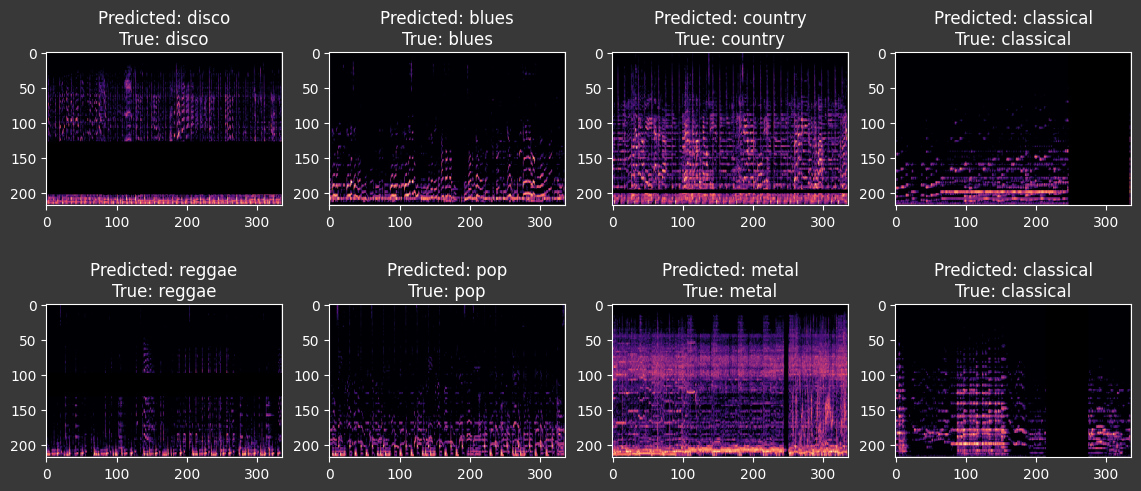

In [37]:
def infer_and_plot(image, y_true, r, c, sample_idx):

    # Use the infer function to get the model's prediction
    y_pred = infer(image)

    # Create a subplot at the position (r, c)
    ax = plt.subplot(r, c, sample_idx + 1)
  
    # Display the image in the subplot
    ax.imshow(image)
  
    # Set the title of the subplot to the model's prediction and the true value
    ax.set_title(f"Predicted: {y_pred}\nTrue: {genre_classifier.config.id2label[str(y_true)]}")

# Create a figure with r rows and c columns of subplots
r = 2
c = 4
fig, axs = plt.subplots(r, c, figsize=(14, 6))

# Iterate over the images in the test dataset
ex_batch = ds["test"][:r * c]
i = 0
for image, y_true in zip(ex_batch["image"], ex_batch["label"]):
    infer_and_plot(image, y_true, r, c, i)
    i += 1

# Show the plot
plt.show()

## 4.0 Conclusion

In conclusion, this project has demonstrated the effectiveness of using a Vision Transformer (ViT) for music genre classification. The model was trained using a combination of horizontal flipping and time and frequency masking data augmentation, which helped to improve its performance and generalization ability. The final model was trained on both the train and validation sets and achieved an accuracy of 98% on the test set. This result shows that Vision Transformers can be a promising approach for music genre classification and other similar tasks.

## 5.0 References

- *Vaswani, A., et al. (2017). [Attention Is All You Need](https://arxiv.org/abs/1706.03762).*

- *Devlin et al., (2019) [Bidirectional Encoder Representations from Transformers (BERT)](https://arxiv.org/abs/1810.04805)*

- *Dosovitskiy, A., et al. (2021). [An image is worth 16x16 words: Transformers for image recognition at scale](https://arxiv.org/abs/2010.11929).*

- *PyTorch Documentation: [Torchvision Transforms](https://pytorch.org/vision/stable/transforms.html), [Torchaudio Transforms](https://pytorch.org/audio/stable/transforms.html#augmentations).*

- 🤗*Hugging Face Documentation: [ViT Model](https://huggingface.co/google/vit-base-patch16-224).*